# Black Friday Sales Predictions
*  Team Members
    * Sarang Suhas Padalkar
    * Karan Hirenkumar Shah

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Black-Friday-Sales-Predictions" data-toc-modified-id="Black-Friday-Sales-Predictions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Black Friday Sales Predictions</a></span><ul class="toc-item"><li><span><a href="#Importing-the-libraries-and-dataset." data-toc-modified-id="Importing-the-libraries-and-dataset.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the libraries and dataset.</a></span></li><li><span><a href="#Feature-Engineering." data-toc-modified-id="Feature-Engineering.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Engineering.</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Shopping-distribution-based-on-gender." data-toc-modified-id="Shopping-distribution-based-on-gender.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Shopping distribution based on gender.</a></span></li><li><span><a href="#Observe-purchase-amount-effect-based-on-gender-and-their-martital-status." data-toc-modified-id="Observe-purchase-amount-effect-based-on-gender-and-their-martital-status.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Observe purchase amount effect based on gender and their martital status.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-person-age-and-marital-status." data-toc-modified-id="Observe-purchase-amount-based-on-person-age-and-marital-status.-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Observe purchase amount based on person age and marital status.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-person-occupation." data-toc-modified-id="Observe-purchase-amount-based-on-person-occupation.-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Observe purchase amount based on person occupation.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-person-age-and-occupation." data-toc-modified-id="Observe-purchase-amount-based-on-person-age-and-occupation.-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Observe purchase amount based on person age and occupation.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-person-occupation-and-city-category." data-toc-modified-id="Observe-purchase-amount-based-on-person-occupation-and-city-category.-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Observe purchase amount based on person occupation and city category.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-person-staying-in-the-city-for-number-of-years." data-toc-modified-id="Observe-purchase-amount-based-on-person-staying-in-the-city-for-number-of-years.-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Observe purchase amount based on person staying in the city for number of years.</a></span></li><li><span><a href="#Observe-purchase-amount-based-on-customers-maritial-status." data-toc-modified-id="Observe-purchase-amount-based-on-customers-maritial-status.-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Observe purchase amount based on customers maritial status.</a></span></li><li><span><a href="#Observe-purchase-amount-by-city-category." data-toc-modified-id="Observe-purchase-amount-by-city-category.-1.3.9"><span class="toc-item-num">1.3.9&nbsp;&nbsp;</span>Observe purchase amount by city category.</a></span></li><li><span><a href="#Find-the-most-bought-product-and-its-count." data-toc-modified-id="Find-the-most-bought-product-and-its-count.-1.3.10"><span class="toc-item-num">1.3.10&nbsp;&nbsp;</span>Find the most bought product and its count.</a></span></li><li><span><a href="#Observe-most-bought-product-based-on-city-category." data-toc-modified-id="Observe-most-bought-product-based-on-city-category.-1.3.11"><span class="toc-item-num">1.3.11&nbsp;&nbsp;</span>Observe most bought product based on city category.</a></span></li><li><span><a href="#Find-the-user-who-has-bought-the-maximum-number-of-products." data-toc-modified-id="Find-the-user-who-has-bought-the-maximum-number-of-products.-1.3.12"><span class="toc-item-num">1.3.12&nbsp;&nbsp;</span>Find the user who has bought the maximum number of products.</a></span></li><li><span><a href="#Products-which-the-user-who-has-bought-most-number-of-products." data-toc-modified-id="Products-which-the-user-who-has-bought-most-number-of-products.-1.3.13"><span class="toc-item-num">1.3.13&nbsp;&nbsp;</span>Products which the user who has bought most number of products.</a></span></li><li><span><a href="#Total-number-of-users-who-shopped-during-black-friday." data-toc-modified-id="Total-number-of-users-who-shopped-during-black-friday.-1.3.14"><span class="toc-item-num">1.3.14&nbsp;&nbsp;</span>Total number of users who shopped during black friday.</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Label-and-One-Hot-encoding" data-toc-modified-id="Label-and-One-Hot-encoding-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Label and One Hot encoding</a></span></li><li><span><a href="#Scaling-the-Data-to-reduce-the-variance" data-toc-modified-id="Scaling-the-Data-to-reduce-the-variance-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Scaling the Data to reduce the variance</a></span></li><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>XGBoost Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li></ul></li><li><span><a href="#Detecting-and-mitigating-age-and-Sex-Bias" data-toc-modified-id="Detecting-and-mitigating-age-and-Sex-Bias-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Detecting and mitigating age and Sex Bias</a></span></li></ul></li></ul></div>

## Importing the libraries and dataset.

In [1]:
%autosave 180
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
import matplotlib.style as style

Autosaving every 180 seconds


In [2]:
# loading the training and testing dataset.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Training dataset information.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train_data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## Feature Engineering.

In [5]:
# Transforming Occupation column.
def df_transform_Occupation(x):
    """Helper function for transforming Occupation column, to make it more informative.
    This function also inherently converts the datatype of the column to string."""
    x = "Occupation "+str(x)
    return x
train_data.Occupation=train_data.Occupation.apply(df_transform_Occupation)
test_data.Occupation=test_data.Occupation.apply(df_transform_Occupation)

In [6]:
train_data.Occupation.unique()

array(['Occupation 10', 'Occupation 16', 'Occupation 15', 'Occupation 7',
       'Occupation 20', 'Occupation 9', 'Occupation 1', 'Occupation 12',
       'Occupation 17', 'Occupation 0', 'Occupation 3', 'Occupation 4',
       'Occupation 11', 'Occupation 8', 'Occupation 19', 'Occupation 2',
       'Occupation 18', 'Occupation 5', 'Occupation 14', 'Occupation 13',
       'Occupation 6'], dtype=object)

In [7]:
# Transforming age columns
def df_transform_Age(x):
    """Helper function for Transforming Age column to make it more infromative.
    The orignal Age ranges are replace by the random values in the age range.
    For age range 55+ we have repaced those values with random values in the range 55-100."""
    if (x != '55+'):
        [min, max]=x.split('-')
        x = np.random.randint(int(min),int(max))
    else:
        x = np.random.randint(55,100)
    return x

train_data.Age=train_data.Age.apply(df_transform_Age)
test_data.Age=test_data.Age.apply(df_transform_Age)

for user in train_data.User_ID.unique():
    age=train_data.Age.loc[train_data.User_ID==user].values[0]
    train_data.Age.loc[train_data.User_ID==user]=age

for user in test_data.User_ID.unique():
    age=test_data.Age.loc[test_data.User_ID==user].values[0]
    test_data.Age.loc[test_data.User_ID==user]=age

C:\Users\padal\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
# Transforming Maritial Status column
def df_transform_Marital_Status(x):
    """Helper function for Transforming Martial_status column to make it more infromative.
    We have replaced the 0 values with Single and 1 valeus with Married.
    This function also inherently converts the datatype of the column to string."""
    if (x != 0):
        x = "Married"
    else:
        x = "Single"
    return x
train_data.Marital_Status=train_data.Marital_Status.apply(df_transform_Marital_Status)
test_data.Marital_Status=test_data.Marital_Status.apply(df_transform_Marital_Status)

In [9]:
# Transforming person staying years in current city
def df_transform_Stay_In_Current_City_Years(x):
    """Helper function for Transforming Stay_In_Current_City_Years column.
    All entries with 4+ values are repaced with random values in the range 4-10."""
    if (x == '4+'):
        x = np.random.randint(4,10)
    return x
train_data.Stay_In_Current_City_Years=pd.to_numeric(train_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))
test_data.Stay_In_Current_City_Years=pd.to_numeric(test_data.Stay_In_Current_City_Years.apply(df_transform_Stay_In_Current_City_Years))

In [10]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
#Replacing missing values.
train_data.fillna("NA",inplace=True)
test_data.fillna("NA",inplace=True)

In [12]:
# Adding new columns.
train_data['User_Count']=train_data.groupby(['User_ID'])['User_ID'].transform('count')
train_data['Product_Count']=train_data.groupby(['Product_ID'])['Product_ID'].transform('count')
test_data['User_Count']=test_data.groupby(['User_ID'])['User_ID'].transform('count')
test_data['Product_Count']=test_data.groupby(['Product_ID'])['Product_ID'].transform('count')

In [13]:
# Counting product category count.
def Product_Category_Count(row):
    """Helper function to get the number of categories for a product."""
    count = 1
    if(row['Product_Category_2'] !="NA"):
        count += 1
    if(row['Product_Category_3'] !="NA"):
        count += 1
    return count
train_data['Product_Category_Count'] = train_data.apply(lambda row: Product_Category_Count(row), axis=1)
test_data['Product_Category_Count'] = test_data.apply(lambda row: Product_Category_Count(row), axis=1)

In [14]:
train_data.drop(['Product_Category_2','Product_Category_3'],inplace = True,axis=1)
test_data.drop(['Product_Category_2','Product_Category_3'],inplace = True,axis=1)

In [15]:
# Binning age feature
def Binned_Age(x):
    """Helper function to classify the Age column into different Age groups for a product.
    Teen Ages(0-17)
    Young Adult Ages(18-25)
    Middle Adult Ages(25-40)
    Adult Ages(40-50)
    Elderly(>50)
    """
    if int(x) <= 17 :
        x = "Teen Ages(0-17)"
    elif int(x) >= 18 and int(x)<25:
        x = 'Young Adult Ages(18-25)'
    elif int(x) >= 25 and int(x)<40:
        x = 'Middle Adult Ages(25-40)'
    elif int(x) >= 40 and int(x)<50:
        x = 'Adult Ages(40-50)'
    elif int(x) >= 50:
        x = 'Elderly(>50)'
    return x
train_data['Binned_Age'] = train_data.Age.apply(Binned_Age)
test_data['Binned_Age'] = test_data.Age.apply(Binned_Age)

In [16]:
# Observe training data with newly created columns.
train_data.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,User_Count,Product_Count,Product_Category_Count,Binned_Age
0,1000001,P00069042,F,3,Occupation 10,A,2,Single,3,8370,35,227,1,Teen Ages(0-17)
1,1000001,P00248942,F,3,Occupation 10,A,2,Single,1,15200,35,581,3,Teen Ages(0-17)
2,1000001,P00087842,F,3,Occupation 10,A,2,Single,12,1422,35,102,1,Teen Ages(0-17)
3,1000001,P00085442,F,3,Occupation 10,A,2,Single,12,1057,35,341,2,Teen Ages(0-17)
4,1000002,P00285442,M,85,Occupation 16,C,4,Single,8,7969,77,203,1,Elderly(>50)
5,1000003,P00193542,M,32,Occupation 15,A,3,Single,1,15227,29,615,2,Middle Adult Ages(25-40)
6,1000004,P00184942,M,46,Occupation 7,B,2,Married,1,19215,14,1440,3,Adult Ages(40-50)
7,1000004,P00346142,M,46,Occupation 7,B,2,Married,1,15854,14,593,2,Adult Ages(40-50)
8,1000004,P0097242,M,46,Occupation 7,B,2,Married,1,15686,14,912,2,Adult Ages(40-50)
9,1000005,P00274942,M,26,Occupation 20,A,1,Married,8,7871,106,793,1,Middle Adult Ages(25-40)


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null int64
Purchase                      550068 non-null int64
User_Count                    550068 non-null int64
Product_Count                 550068 non-null int64
Product_Category_Count        550068 non-null int64
Binned_Age                    550068 non-null object
dtypes: int64(8), object(6)
memory usage: 58.8+ MB


In [18]:
# Finding correlation of features with respect to purchase(Target variable).
train_data.corr()['Purchase']

User_ID                       0.004716
Age                           0.011876
Stay_In_Current_City_Years    0.003897
Product_Category_1           -0.343703
Purchase                      1.000000
User_Count                   -0.090356
Product_Count                 0.308641
Product_Category_Count        0.323187
Name: Purchase, dtype: float64

## Data Visualization

### Shopping distribution based on gender.  

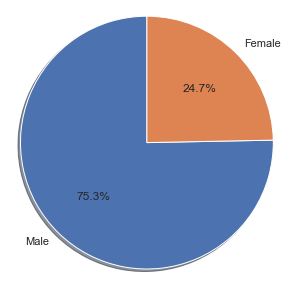

In [20]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

Gender_vals = train_data['Gender'].value_counts().tolist()
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Male', 'Female']
plt.pie(Gender_vals, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
#         colors= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
       )
axis = plt.axis('equal')
plt.style.use(('ggplot'))

### Observe purchase amount effect based on gender and their martital status.

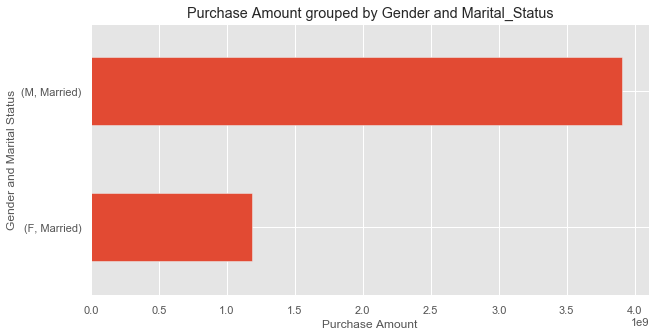

In [21]:
groupby=train_data.groupby(['Gender','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Gender and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Gender and Marital Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and marital status.

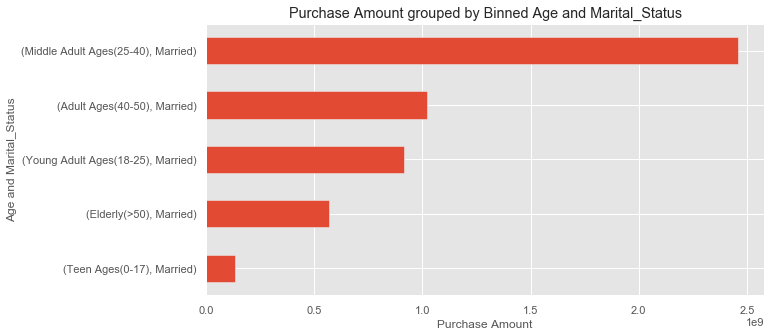

In [22]:
groupby=train_data.groupby(['Binned_Age','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation.

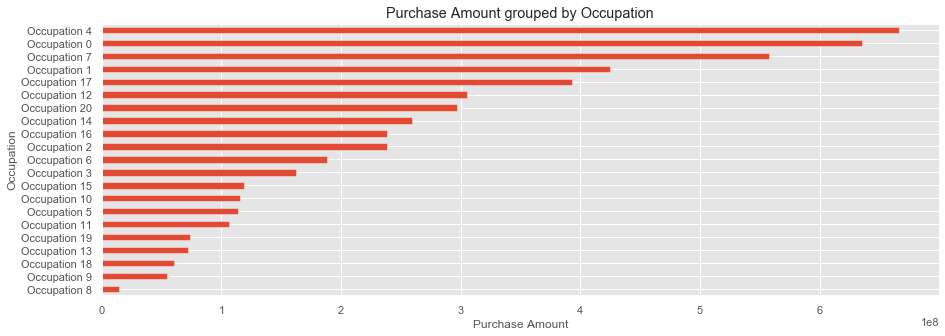

In [23]:
groupby=train_data.groupby('Occupation').sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(15, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person age and occupation. 

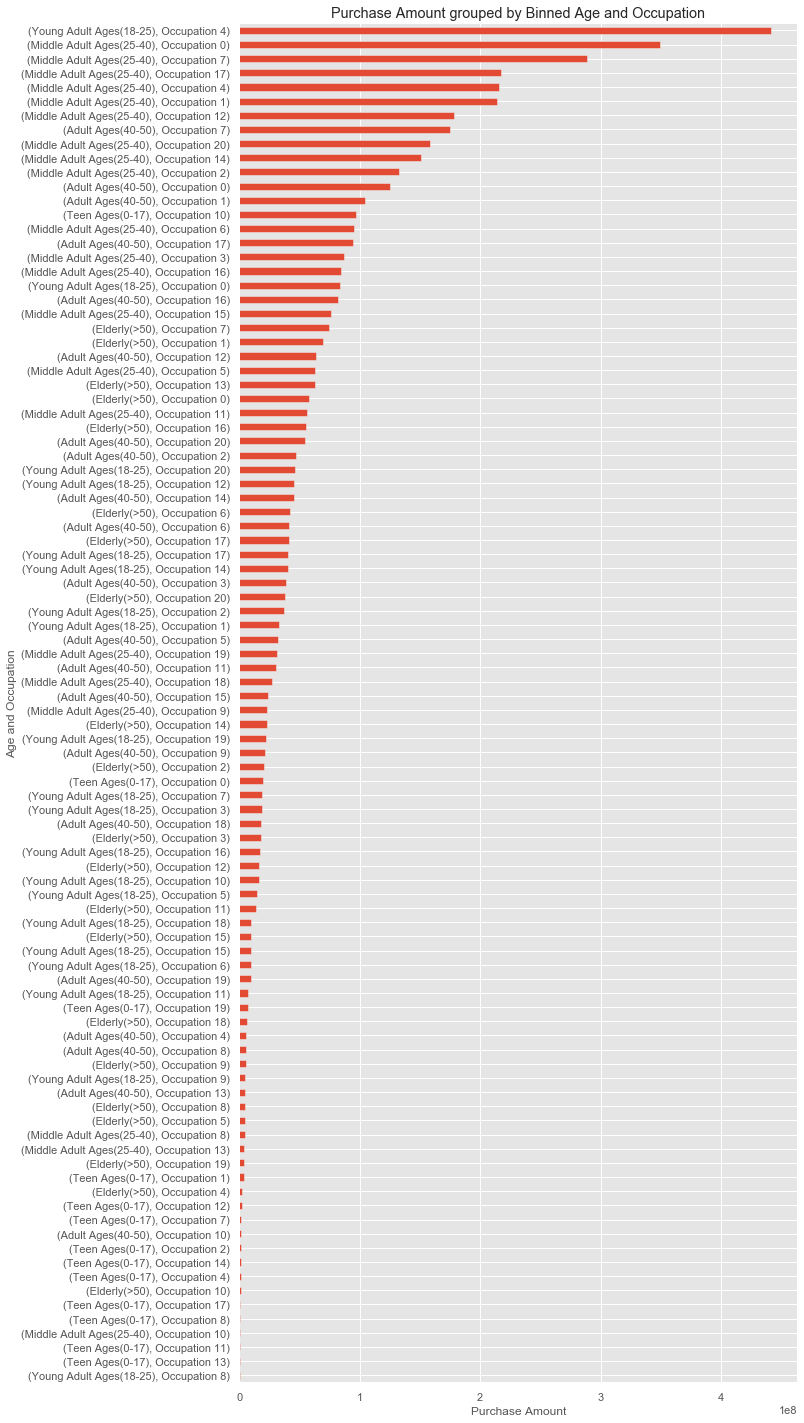

In [24]:
groupby=train_data.groupby(['Binned_Age','Occupation']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 25))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Binned Age and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person occupation and city category.

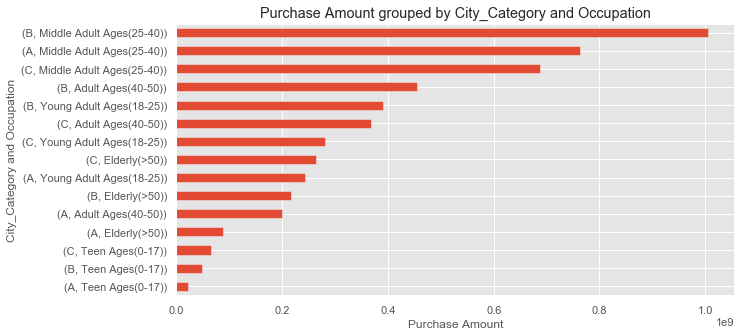

In [25]:
groupby=train_data.groupby(['City_Category','Binned_Age']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by City_Category and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('City_Category and Occupation')
plt.style.use(('ggplot'))

### Observe purchase amount based on person staying in the city for number of years.

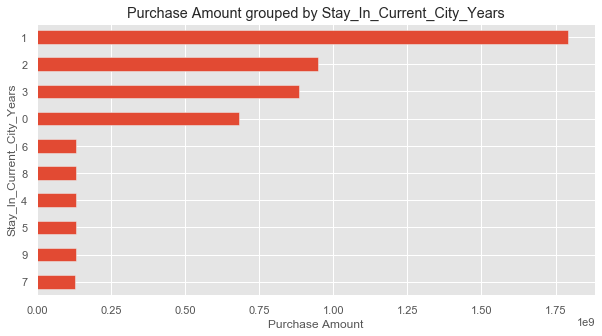

In [26]:
groupby=train_data.groupby(['Stay_In_Current_City_Years']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh')
plt.title('Purchase Amount grouped by Stay_In_Current_City_Years')
plt.xlabel('Purchase Amount')
plt.ylabel('Stay_In_Current_City_Years')
plt.style.use(('ggplot'))

### Observe purchase amount based on customers maritial status.

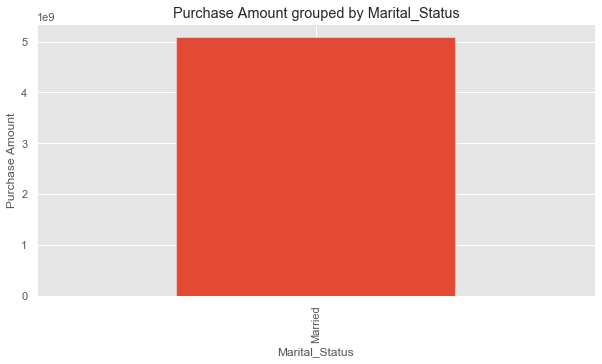

In [27]:
groupby=train_data.groupby('Marital_Status').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by Marital_Status')
plt.ylabel('Purchase Amount')
plt.xlabel('Marital_Status')
plt.style.use(('ggplot'))

### Observe purchase amount by city category.

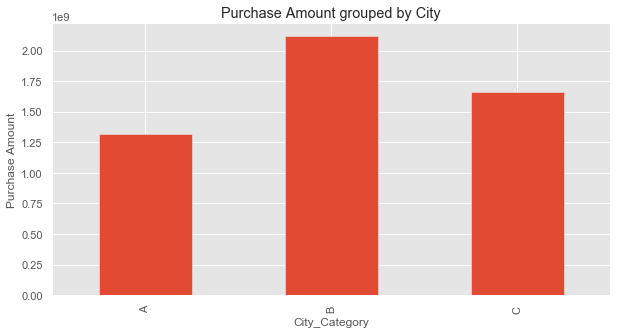

In [28]:
groupby=train_data.groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City')
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the most bought product and its count.

In [29]:
print("The most bought Product: ", train_data.Product_ID.loc[train_data.Product_Count==np.max(train_data.Product_Count.unique())].unique()[0])
print('The most bought prouduct count: ', np.max(train_data.Product_Count.unique()))

The most bought Product:  P00265242
The most bought prouduct count:  1880


### Observe most bought product based on city category.

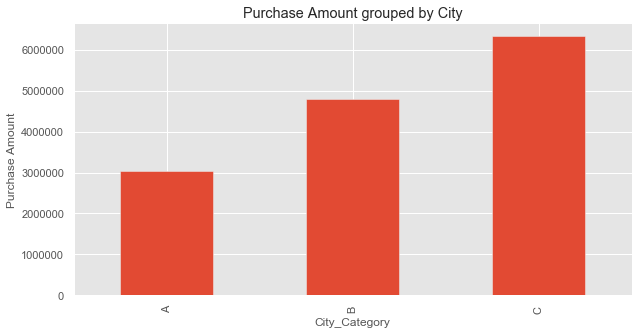

In [30]:
groupby=train_data.loc[train_data.Product_ID=='P00265242'].groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='bar')
plt.title('Purchase Amount grouped by City') 
plt.ylabel('Purchase Amount')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

### Find the user who has bought the maximum number of products.

In [ ]:
print ("The user who has bought maximum number of products: ", train_data.User_ID.loc[train_data.User_Count==np.max(train_data.User_Count.unique())].unique()[0])

### Products which the user who has bought most number of products.

In [ ]:
train_data.loc[train_data.User_ID==1001680]

### Total number of users who shopped during black friday.

In [ ]:
len(train_data.User_ID.unique())

##  Modeling

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Label and One Hot encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onhot_cols = ['Occupation','City_Category']
categorical_columns = [x for x in train_data.columns if x not in onhot_cols if x != 'Purchase']
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda col: le.fit_transform(col))
test_data[categorical_columns] = test_data[categorical_columns].apply(lambda col: le.fit_transform(col))

train_data = pd.get_dummies(train_data, columns=onhot_cols)
test_data = pd.get_dummies(test_data, columns=onhot_cols)

### Scaling the Data to reduce the variance

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = train_data.drop('Purchase',axis=1)
y = train_data['Purchase']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
test_data = scaler.fit_transform(test_data)

### Linear Model

In [93]:
# model evaluation for testing set
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_test_predict = lin_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print('RMSE is {}'.format(rmse))
print('R squared score Linear Model: {}'.format(r2))

predictions = lin_model.predict(test_data)
print ("-----------Predictions on Test Data-----------")
print (predictions)

RMSE is 4533.878439831682
R squared score Linear Model: 0.18501399997377066
-----------Predictions on Test Data-----------
[ 4.03312529e+12 -1.99404817e+13 -5.74658046e+12 ... -5.02291069e+12
 -5.27426559e+12  1.05874166e+13]


### XGBoost Regressor

In [94]:
model_xgb = XGBRegressor(cv=5, max_depth= 10,nrounds=500, n_jobs = -1)
model_xgb.fit(X_train,y_train)

# make prediction
preds_xgb = model_xgb.predict(X_test)

print('MSE:', metrics.mean_absolute_error(y_test, preds_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_xgb)))
print('R squared score XGBOOST :', r2_score(y_test, preds_xgb, multioutput='variance_weighted'))


e:\softwares\python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:52:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 1910.7252635942505
RMSE: 2571.9450351628793
R squared score XGBOOST : 0.7377389649574168


### Random Forest Regressor

In [95]:
model_rf = RandomForestRegressor(n_jobs = -1, random_state=42)

model_rf.fit(X_train,y_train)

score = model_rf.score(X_train,y_train)

pred_randomf = model_rf.predict(X_test)
print('MSE Random Forest:', metrics.mean_absolute_error(y_test, pred_randomf))
print('RMSE Random Forest:', np.sqrt(metrics.mean_squared_error(y_test, pred_randomf)))

print('R squared score Random Forest:', r2_score(y_test, pred_randomf, multioutput='variance_weighted'))

predictions = model_rf.predict(test_data)
print ("-----------Test Predictions on Test Data-----------")
print (predictions)

MSE Random Forest: 1964.1081785954511
RMSE Random Forest: 2666.0357200184417
R squared score Random Forest: 0.7181991281257973
-----------Test Predictions on Test Data-----------
[17765.89 10037.78  5532.45 ... 11044.21 13920.39  2341.72]


In [6]:
# Grid Search with Cross Validation for Evaluation of Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()
# grid search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [1]:
print (grid_search.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}


## Detecting and mitigating age and Sex Bias

In [22]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import StructuredDataset

In [ ]:
train_data.head()

In [23]:
protected_attribute_names = ['Gender']

dataset_orig = StructuredDataset(train_data, train_data.columns, protected_attribute_names,
                  instance_weights_name=None, 
                  scores_names=[], unprivileged_protected_attributes=[], privileged_protected_attributes=[]
                 )


dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)


In [24]:
unprivileged_groups = [{'Gender': 1}]
privileged_groups = [{'Gender': 1}]
metric_transf_train = BinaryLabelDatasetMetric(dataset_orig_train,
#                                                unprivileged_groups = unprivileged_groups, 
#                                                privileged_groups = privileged_groups
                                              )

TypeError: 'dataset' should be a BinaryLabelDataset